# Intro to Data Science 
# Week 4 - Regression 

This week we are interested in **relationships between variables**

## Overview

We'll look at 

* Some new Pandas Tricks

* Correlation 

* Simple Linear Models (Bivariate)

    * Fitting
    
    * Interpretting 
    
    * Evaluating 
    
* Multiple Linear Models (Multivariate)    

    * Fitting
    
    * Interpretting
    
    * Using for predictions
    
    
## Configuring Pandas and Numpy

You can use `pd.set_option()` to set some notebook-wide options for **Pandas**. 

### Display

Pandas by default will abridge print outs and only show a certain number of rows, sometimes we want to see more than this! We can use `'display.max_rows'` and `'display.max_columns'` to set this. 

Pro Tip: You can use `pd.set_option('display.max_rows', None)` to always show all rows but **use with caution**. If you ask Pandas to print out a DataFrame with 1000000 rows, it will crash your notebook 

### Scientific Notation 

**Scientific Notation** is a when large or small numbers are shown with just the digits, with the decimal point placed after the first digit, followed by× 10 to a power that puts the decimal point where it should be (i.e. it shows how many places to move the decimal point).

e.g. 0.0000123 = 1.23x10<sup>-5</sup> or 123,000,000 = 1.23x10<sup>8</sup>

I find this hard to read to you can surpress it in Pandas and NumPy using the commands below

In [1]:
import pandas as pd
import numpy as np
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)!git clone https://github.com/Louismac/NLP-Public%cd NLP-Public

## The Dataset 

The Electronic Frontier Foundation has collected a dataset called the [Atlas of Surveillance](https://atlasofsurveillance.org/). The Atlas of Surveillance is a database of surveillance technologies deployed by law enforcement in communities across the United States. 

This includes drones, body-worn cameras, automated license plate readers, facial recognition, and more.

I'm curious if any states are utilising this technology **more than others** and **why** this might be. 

In this lecture we'll see how we might go about using some data science methods to approach this topic. 

First, lets explore the data

In [2]:
#Load in the CSV
police_df = pd.read_csv("data/Atlas-of-Surveillance-20210204.csv")

In [3]:
#Look at the columns
police_df.columns

Index(['AOSNUMBER', 'City', 'County', 'State', 'Agency', 'Type of LEA',
       'Summary', 'Type of Juris', 'Technology', 'Vendor', 'Link 1',
       'Link 1 Snapshot', 'Link 1 Source', 'Link 1 Type', 'Link 1 Date',
       'Link 2', 'Link 2 Snapshot', 'Link 2 Source', 'Link 2 Type',
       'Link 2 Date', 'Link 3', 'Link 3 Snapshot', 'Link 3 Source',
       'Link 3 Type', 'Link 3 Date', 'Other Links'],
      dtype='object')

### .value_counts()

We can use ``value_counts()`` to find count up examples of unique values. 

We use it below to see what the types of surveillance tech is, and how often each one occurs in the dataset. 

We can also use it to see which states have the most reports

In [4]:
#Count the types of surveillance tech in the database
police_df["Technology"].value_counts()

Body-worn Cameras                  1703
Ring/Neighbors Partnership         1501
Drones                             1084
Automated License Plate Readers     816
Camera Registry                     409
Face Recognition                    376
Predictive Policing                 149
Gunshot Detection                   123
Real-Time Crime Center               83
Fusion Center                        79
Cell-site Simulator                  69
Video Analytics                      38
Name: Technology, dtype: int64

In [5]:
#Count the reports for each state
police_df["State"].value_counts()

CA                   778
FL                   610
NJ                   410
IL                   388
TX                   382
SC                   263
OH                   229
NY                   219
GA                   213
TN                   172
VA                   155
MN                   152
AZ                   151
MI                   145
NC                   141
WI                   129
PA                   128
CO                   112
IN                   112
MO                   110
AL                   102
MS                    93
MD                    88
CT                    86
OR                    84
KY                    79
OK                    79
MA                    78
WA                    71
KS                    66
NV                    63
AR                    55
IA                    51
NM                    46
LA                    46
UT                    44
NE                    43
ID                    38
ND                    25
DE                    23


### .reset_index()

``value_counts()`` returned us a **Series**, with the state abbreviation as the index. Moving forwards, its going to be useful to have this data (the state and its count) as its own dataframe. 

We use ``.reset_index()`` to move all the data into its own columns, then apply new column names

In [6]:
state_counts_df = pd.DataFrame(police_df["State"].value_counts()).reset_index()
state_counts_df.columns = ['State', 'Surveillance']
state_counts_df

,State,Surveillance
0,CA,778
1,FL,610
2,NJ,410
3,IL,388
4,TX,382
5,SC,263
6,OH,229
7,NY,219
8,GA,213
9,TN,172


## Bringing in extra data

It looks from above that California is the worst offender, but my limited knowledge of the USA also makes me think that they probably have more people and more police. Is there large number of reports just accounted for by this? Also, one might also assume that states with higher crime rates may explain higher numbers of reported surveillance technology. 


### FBI Dataset 

I found an [FBI dataset](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/tables/table-4) which gives me not only the populations for each state, but also some crime statistics which might be useful later. 

First we're going to have to do some wrangling to the data! Loading it in I immediately see a few things wrong that I'll need to sort out. 

1. There seems to some extra columns at the end that have no information in them! Probably can just remove these 

2. Each ``Area`` is given, followed by two ``NaN`` columns. This is because I made a ``.csv.`` out of a weirdly formatted excel sheet (the original format of the dataset) and there are current year, previous year and change stats for each ``Area``. We only need to one for each ``Area``. 


In [9]:
#https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/tables/table-4
pop_df = pd.read_csv("data/us-crime.csv")
pop_df

,Area,Population,ViolentCrime,ViolentCrimePer100000,Unnamed: 4,Unnamed: 5
0,Northeast,"56,046,620","164,441",293.4,NaN,NaN
1,NaN,"55,982,803","163,717",292.4,NaN,NaN
2,NaN,NaN,-0.4,-0.3,NaN,NaN
3,New England,"14,829,322","38,294",258.2,NaN,NaN
4,NaN,"14,845,063","36,350",244.9,NaN,NaN
...,...,...,...,...,...,...
190,NaN,"7,614,893","22,377",293.9,NaN,NaN
191,NaN,NaN,-5.7,-6.8,NaN,NaN
192,Puerto Rico,"3,193,354","6,417",200.9,NaN,NaN
193,NaN,"3,193,694","6,479",202.9,NaN,NaN


### .drop()

We can use ``.drop()`` to remove our unwanted columns. We give the **names** and then the argument **axis=1** to tell Pandas we are talking about columns that need dropping. 

In [10]:
#Drop the columns we dont want
pop_df = pop_df.drop(["Unnamed: 4", "Unnamed: 5"], axis = 1)
pop_df

,Area,Population,ViolentCrime,ViolentCrimePer100000
0,Northeast,"56,046,620","164,441",293.4
1,NaN,"55,982,803","163,717",292.4
2,NaN,NaN,-0.4,-0.3
3,New England,"14,829,322","38,294",258.2
4,NaN,"14,845,063","36,350",244.9
...,...,...,...,...
190,NaN,"7,614,893","22,377",293.9
191,NaN,NaN,-5.7,-6.8
192,Puerto Rico,"3,193,354","6,417",200.9
193,NaN,"3,193,694","6,479",202.9


### .dropna()

We can use ``.dropna()`` to drop and rows that have ``NaN`` values in. This should remove the unwanted rows under each ``Area``

In [11]:
#Drop all rows with NaN in 
pop_df = pop_df.dropna()
pop_df

,Area,Population,ViolentCrime,ViolentCrimePer100000
0,Northeast,"56,046,620","164,441",293.4
3,New England,"14,829,322","38,294",258.2
6,Connecticut,"3,571,520","7,485",209.6
9,Maine,"1,339,057","1,500",112.0
12,Massachusetts,"6,882,635","23,424",340.3
15,New Hampshire,"1,353,465","2,404",177.6
18,Rhode Island,"1,058,287","2,326",219.8
21,Vermont,"624,358","1,155",185.0
24,Middle Atlantic,"41,217,298","126,147",306.1
27,New Jersey,"8,886,025","18,536",208.6


### .dtypes, .to_numeric(), str.replace()

Using ``.dtypes`` we can see that ``Population``, ``ViolentCrime`` and ``ViolentCrimePer100000`` are all ``object`` type. We'll need to convert them to numbers if we're going to use them for calculations. 

``pd.to_numeric()`` lets us convert the ``object``s to numbers. This will work for ``ViolentCrimePer100000`` but not for ``Population`` and ``ViolentCrime``. This is because the numbers actually have **commas** in them and Pandas isn't smart emough to work it out. 

We can remove the commas by using ``.str.replace()``. Here we provide the string we wanted to replace, and the string we want to insert in its place 

In [12]:
print("Before\n",pop_df.dtypes)
pop_df["Population"] = pop_df['Population'].str.replace(",","")
pop_df["Population"] = pd.to_numeric(pop_df['Population'])
pop_df["ViolentCrime"] = pop_df['ViolentCrime'].str.replace(",","")
pop_df["ViolentCrime"] = pd.to_numeric(pop_df['ViolentCrime'])
pop_df["ViolentCrimePer100000"] = pd.to_numeric(pop_df['ViolentCrimePer100000'])
print("After\n",pop_df.dtypes)

Before
 Area                     object
Population               object
ViolentCrime             object
ViolentCrimePer100000    object
dtype: object
After
 Area                      object
Population                 int64
ViolentCrime               int64
ViolentCrimePer100000    float64
dtype: object


<ipython-input-12-94ae7d64e236>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df["Population"] = pop_df['Population'].str.replace(",","")
<ipython-input-12-94ae7d64e236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df["Population"] = pd.to_numeric(pop_df['Population'])
<ipython-input-12-94ae7d64e236>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

### .unique()

Now lets look at the place names. This dataset uses ``Area`` and using ``.unique()`` we can see all the unique values in this column. We see there are states, as well as larger geographic areas (e.g. West North Central)

In [13]:
pop_df["Area"].unique()

array(['Northeast', 'New England', '     Connecticut', '     Maine',
       '     Massachusetts', '     New Hampshire', '     Rhode Island',
       '     Vermont', 'Middle Atlantic', '     New Jersey',
       '     New York', '     Pennsylvania', 'Midwest5',
       'East North Central', '     Illinois', '     Indiana',
       '     Michigan', '     Ohio', '     Wisconsin',
       'West North Central5', 'Iowa5', '     Kansas', '     Minnesota',
       '     Missouri', '     Nebraska', '     North Dakota',
       '     South Dakota', 'South 6, 7', 'South Atlantic6, 7',
       '     Delaware', 'District of Columbia6', '     Florida',
       '     Georgia', '     Maryland', 'North Carolina7',
       '     South Carolina', '     Virginia', '     West Virginia',
       'East South Central', '     Alabama', '     Kentucky',
       '     Mississippi', '     Tennessee', 'West South Central',
       '     Arkansas', '     Louisiana', '     Oklahoma', '     Texas',
       'West', 'Mountain', '   

### str.strip(), .rename()

We want to match up this data with the surveillance data (which is seprated into states), there are few issues facing us 

1. Our column is called ``Area`` and not ``State``

2. Out states have tab spacing formatting in front of them

3. Our states are full names, the surveillance data was abbreviations 

We can fix the first 2 issues with ``.rename()`` and ``str.strip()``, the latter removing all whitespace.



In [14]:
pop_df = pop_df.rename(columns = {'Area':'State'})
pop_df["State"] = pop_df["State"].str.strip()
pop_df["State"].unique()

array(['Northeast', 'New England', 'Connecticut', 'Maine',
       'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
       'Middle Atlantic', 'New Jersey', 'New York', 'Pennsylvania',
       'Midwest5', 'East North Central', 'Illinois', 'Indiana',
       'Michigan', 'Ohio', 'Wisconsin', 'West North Central5', 'Iowa5',
       'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota',
       'South Dakota', 'South 6, 7', 'South Atlantic6, 7', 'Delaware',
       'District of Columbia6', 'Florida', 'Georgia', 'Maryland',
       'North Carolina7', 'South Carolina', 'Virginia', 'West Virginia',
       'East South Central', 'Alabama', 'Kentucky', 'Mississippi',
       'Tennessee', 'West South Central', 'Arkansas', 'Louisiana',
       'Oklahoma', 'Texas', 'West', 'Mountain', 'Arizona', 'Colorado',
       'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
       'Pacific', 'Alaska', 'California', 'Hawaii', 'Oregon',
       'Washington', 'Puerto Rico'], dtype=object)

### .merge()

To combine the datasets we're going to use a pandas function called ``.merge()``. It takes any columns with **the same name** and matches rows that have **the same value for that column**. 

First, we're going to merge our **FBI** dataset, with another one I found that has both state names and state abbreviations. They'll match everything along the **State** column. Luckily, anything with no match gets dropped so this removes all of our non state entries as well. Bonus.

Then we're going to merge the new dataset with the surveillance dataset along the **Code** column and remove all the unwanted columns. 

In [15]:
#Load in abbreviations
abbrev_df = pd.read_csv("data/state_names.csv")
abbrev_df

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [16]:
#Merge abbreviations and FBI
pop_codes_df = pd.merge(abbrev_df, pop_df)
pop_codes_df

,State,Abbrev,Code,Population,ViolentCrime,ViolentCrimePer100000
0,Alabama,Ala.,AL,4887681,25567,523.10000
1,Alaska,Alaska,AK,735139,6555,891.70000
2,Arizona,Ariz.,AZ,7158024,34053,475.70000
3,Arkansas,Ark.,AR,3009733,16904,561.60000
4,California,Calif.,CA,39461588,176604,447.50000
5,Colorado,Colo.,CO,5691287,22851,401.50000
6,Connecticut,Conn.,CT,3571520,7485,209.60000
7,Delaware,Del.,DE,965479,4079,422.50000
8,Florida,Fla.,FL,21244317,81980,385.90000
9,Georgia,Ga.,GA,10511131,35619,338.90000


In [17]:
#Merge new FBI and Surveillance
pop_codes_df = pop_codes_df[["Code","Population","ViolentCrime","ViolentCrimePer100000"]]
pop_codes_df = pop_codes_df.rename(columns = {'Code':'State'})
state_counts_df = pd.merge(state_counts_df, pop_codes_df)
state_counts_df

,State,Surveillance,Population,ViolentCrime,ViolentCrimePer100000
0,CA,778,39461588,176604,447.50000
1,FL,610,21244317,81980,385.90000
2,NJ,410,8886025,18536,208.60000
3,IL,388,12723071,52343,411.40000
4,TX,382,28628666,118197,412.90000
5,SC,263,5084156,25463,500.80000
6,OH,229,11676341,34426,294.80000
7,NY,219,19530351,68512,350.80000
8,GA,213,10511131,35619,338.90000
9,TN,172,6771631,42687,630.40000


## Examing the relationship between two variables 

So we had seen that there was a big difference in the number of surveillance reports for each state, but had suspected that it may be linked to population 

Here we plot them against each other and it looks like they are related!

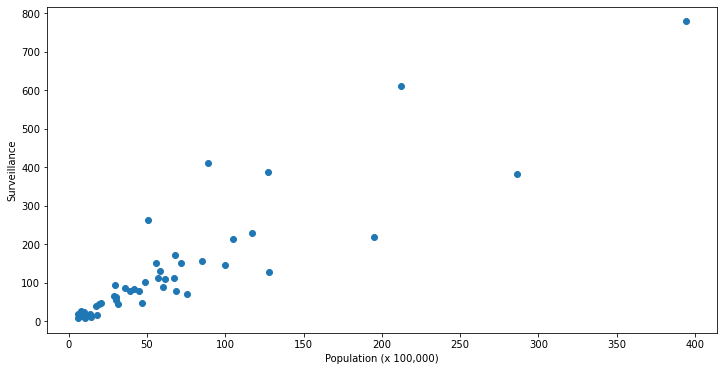

In [18]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = state_counts_df[["Population","Surveillance"]].values
x = data[:,0]/100000
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Population (x 100,000)","Surveillance")

### Correlation 

We've previously use **correlation** to investigate how much of relationship there is between two variables. 

We would say there is probably positive correlation between the ``Population`` and ``Surveillance``. If the relationship was matching the other way round, we'd say it had negative correlation.

But can we calculate this relationship with a number?

### .stats.pearsonr()

Runs from -1 to 1 and tells us how correlated two variables are. A correlation of 0 is random (no relationship).

Here we see that Pearson's r coeffient is 0.891820. This closeness to 1 tells us that there is a pretty good correlation between the ``Population`` and ``Surveillance``. 

In [19]:
#Correlate
from scipy import stats
r, p = stats.pearsonr(x,y)
r

0.8918201082572657

## Making Models

So we have determined that we think there is a linear relationship between these two variables, now we'll look at how we can build a **linear model** to fit this relationship. 

Having a model allows us to **make predictions** about new values e.g. given what we know, how much surveillance tech should a state have based on its population? 

### Formula of a line

We can define the function for **any line** in the form 

``
y = ax + b
``

Where ``a`` gives us the slope of the line, and ``b`` tells us where this line **intercepts** the **y axis**

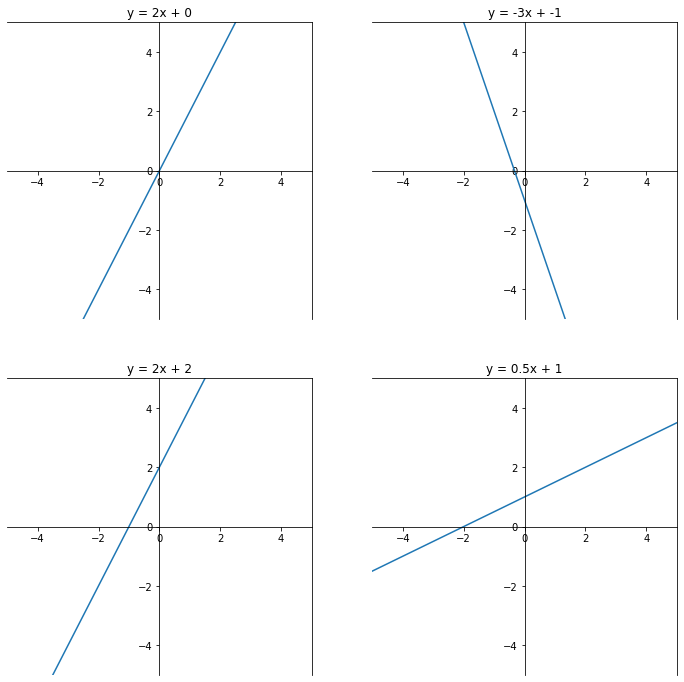

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
def plot_line(a,b,ax):
    x = np.linspace(0,10,100) - 5
    y = [(a * i) + b for i in x]
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
    ax.set_title("y = " + str(a) + "x + " + str(b))
    ax.plot(x,y)

plot_line(2,0,ax[0][0])
plot_line(2,2,ax[1][0])
plot_line(0.5,1,ax[1][1])
plot_line(-3,-1,ax[0][1])

### What is a model?

The US Federal Reserve defines a model as 

``
"A representation of some aspect of the world that is based on simplifying assumptions"
``

David Speigelhalter says 

``
"A Statistical Model is a formal representation of the relationship between two variables, which we can use for...explanation or prediction"
``

And broadly we can determine that for any observation 

``
observation = deterministic model + error
``

That being that 

``
"In the statistical world, what we see and measure around us can be considered as the sum of a systematic idealised mathematical form plus some random contribution that cannot yet be explained"
``

So we are our model will be defined completely using the formual below

``
y = ax + b + e
``

Where ``y`` is the dependent variable (``surveillance``), ``x`` is the independent variable (`population`), `a` and `b` are two parameters for us to set and `e` is the error. 

### Other Examples

As well as our current police example, we could also try and model the relationship between 

* Price of painting at auction given previous sale price


* Box office takings for a film given money spent on advertising


* Daily minutes spent on social media app given number of friends


### Least Squares Error 

Similarly to when we looked at neural networks, we'll need to find value **parameters** (``a`` and ``b``) that **minimise** (get the lowest value of) an **error function**. 

In the case of a **linear model**, we use the **sum of the squared error**. 

1. Take the error of each point (actual y - predicted y)

2. Square (makes all the differences positive to avoid cancelling out) 

3. Sum **all the squared errors together**

Whilst it is possible to use **gradient descent** to find the right values of ``a`` and ``b``, there is actually an algebraic solution where we can just solve to find the best values!

In this lovely GIF, we see how the errors for each point changes with different lines (different values of ``a`` and ``b``).

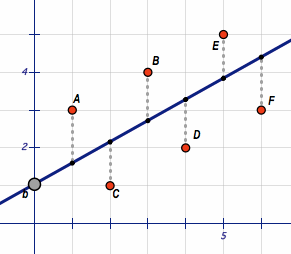

### .stats.linregress()

And we can do that using ``linregress()`` from the ``scipy.stats`` package. This returns us a value for the **slope** (``a``) and **intercept** (``b``). 

We can then plot the line, looks like a pretty good model!

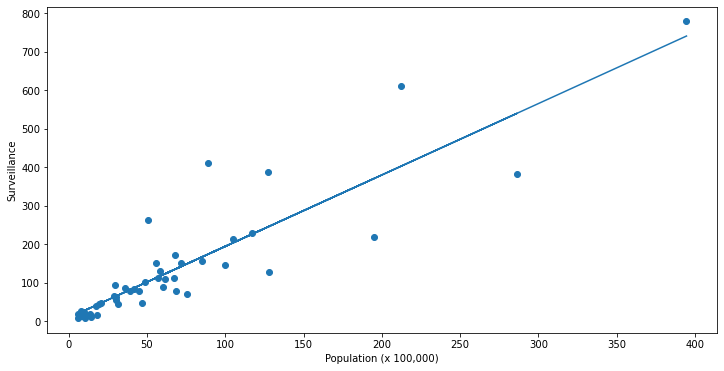

In [21]:
data = state_counts_df[["Population","Surveillance"]].values
x = data[:,0]/100000
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Population (x 100,000)","Surveillance")
ax.plot(x, model_y)

### Interpretting the Model 

So instead of having a list of points, we now have a **model**, and this model is defined by a **slope** and an **intercept**. 

``
Surveillance = 1.85*Population + 8.5 + error
``

Beyond plotting the line, what else does this model tell us?

With an intercept of 8.5 and a slope of 1.85, we can say that starting at 8.5, for every 185,000 people we'd expect to see 1 more report of surveillance tech.

We can also put in new population values and predict what level of surveillance we might expect. 

### Other Examples

Given the previous examples, we might use fitted linear model to calculate 

**How much we think a painting may appreciate?** 

``
ResalePrice = 4*LastPrice + 2 + error
``

**How much money to spend on advertising a film?**

``
Profit = 0.7*AdvertSpend + 7 + error
``

In [22]:
#Interpret our police model
slope, intercept

(1.853923, 8.589829566110836)

### Evaluate 

### **r <sup>2<sup>**

But how good is our model? How much faith can be put in these predictions and explanations we're drawing from it? Whilst its fairly easy for us to eyeball the line with this dataset, its always nice to put a number on these things when doing a more formal, scientific evalaution. 

We use the **r <sup>2<sup>** (r squared), otherwise known as the **coefficient of determination** to evaluate the fit of our model. This tells us how much of the variation in the dependent variable (``y``) is explained by the model. 
    
An **r <sup>2<sup>** of 1 is a perfect model and an **r <sup>2<sup>** of 0 means the model is no better than just picking the **mean** for every prediction.

In [23]:
#a good fit? Also known as the Coefficient of determination
r

0.8918201082572657

### p-value

We also get a **p-value** returned by our model, and we know that this is result of a **hypothesis test**. 

The hypothesis we are looking to test is that there is a non-zero slope for this model, making the **null hypothesis** that **the slope is 0**. A **p-value** of less than 0.05 allows us the **reject the null hypothesis** and conclude there is a relationship between the two variables

Our low p-value allows to conclude this is in fact the case for **Surveillance** and **Population**.

In [24]:
p

1.858794368013206e-17

### Which states don't fit the model, .annotate()

We can see our **r <sup>2<sup>** close to 1 means that our model is a good fit. 

We can also see that some of the states deviate quite signficantly from the general trend, pointing towards that these states perhaps use more or less surveillance than one would expect from a state that size.
    
In order to see which states to investigate further, we can take the **state codes** and use the ``.annotate()`` function in ``pyplot`` to add in some labels
    

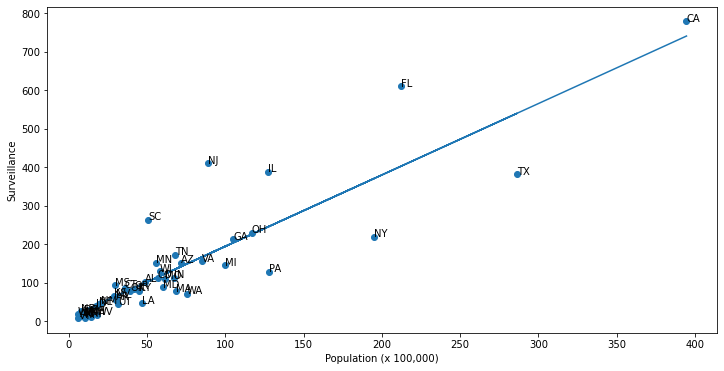

In [25]:
def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    annotations = state_counts_df["State"].values
    for i, label in enumerate(annotations):
        ax.annotate(label, (x[i], y[i]))
    return ax

ax = plot_scatter(x,y,"Population (x 100,000)","Surveillance")
ax.plot(x, model_y)


We see that **Florida** appears quite far above the line. We can then determine that Florida has more than 1.5 times more surveillance reports than our model would predict for a state with its population. It is worth noting that this model only takes into account **population** and it may that there are other variables that account for this that we have not included in out model. 

This being said, this simple, linear model does appear to explain most of the variance the dependent variable (**Surveillance**), so states that are significantly above the predicted value perhaps require further investigation to account for their over-use of these technologies.
    
We can also get this calculation for every state, and we can see that proportionally, **South Carolina** has the most excess surveillance beyond what our population based model would predict.

In [26]:
fl = state_counts_df[state_counts_df["State"] == "FL"]
fl_pop = fl["Population"]/100000
fl_predicted = fl_pop * slope
fl_ratio = fl["Surveillance"]/fl_predicted
fl_ratio
#FL has 1.54 times what the model would predict

1   1.54880
dtype: float64

In [27]:
state_counts_df["ratioToModel"] = state_counts_df["Surveillance"]/((state_counts_df["Population"]/100000)*slope)
state_counts_df.sort_values("ratioToModel", ascending = False)[["State","ratioToModel"]]

,State,ratioToModel
5,SC,2.79026
2,NJ,2.48877
36,ND,1.77883
20,MS,1.68278
39,WY,1.68094
3,IL,1.64493
1,FL,1.54880
11,MN,1.46244
9,TN,1.37007
22,CT,1.29883


## Violent Crime is not a good predictor

So **Population can explain most of the variation in our data**, but what other information could we bring in that might also account for the error that exists between some of the observations and the model?

Average crime budget? Percentage of Republican Senators? Average Income? Ethnic make up?

Our **FBI** stats also tell us about the violent crimes commited in each state. Perhaps the amount of crime will also be a good predictor of surveillance tech?


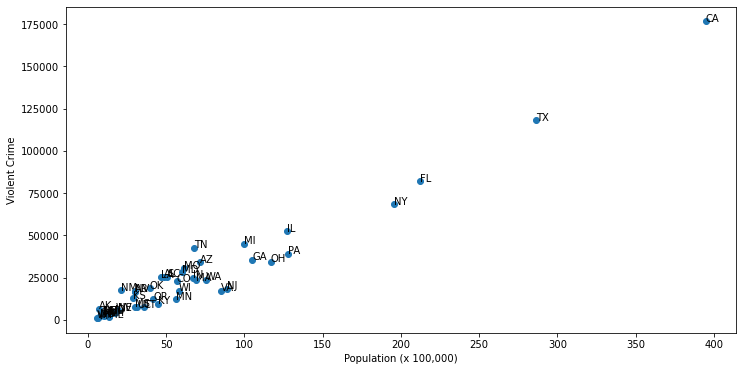

In [28]:
data = state_counts_df[["Population","ViolentCrime"]].values
x = data[:,0]/100000
y = data[:,1]
ax = plot_scatter(x,y,"Population (x 100,000)","Violent Crime")

### Per Capita Violent Crime rate

We have already seen that there is a strong relationship between **Population** and **Surveillance**, as well as one between **Total Violent Crime** and **Surveillance** (see above). 

We'll take that into account when picking our dependent variable and see if there is any relationship between **Surveillance** and **Violent Crime per 100,000 residents**. This is important, because if we just examined **Total Violent Crime** and **Surveillance**, it may look like there is a relationship, but it may in fact be that the relationship is mainly accounted for by population.

Eyeballing the data, there doesn't appear to much of a linear relationship. Also, when we try to fit the model, the **r <sup>2<sup>** score is close to 0, indicating that the variance in the dependent variable (surveillance) is not well explained by the independent variable (violent crime per capita). The **p-value** of 0.68 also would suggest that  when we account for population size, **we cannot conclude that crime rate effects the number of reports of surveillance technology**. 
    
Moving forwards, I would say this particular relationship is not a suitable fit for linear modelling, or may be better explained by multiple variables.

(0.05905657, 107.28173460302474, 0.060533938397875846, 0.6827513453594778)

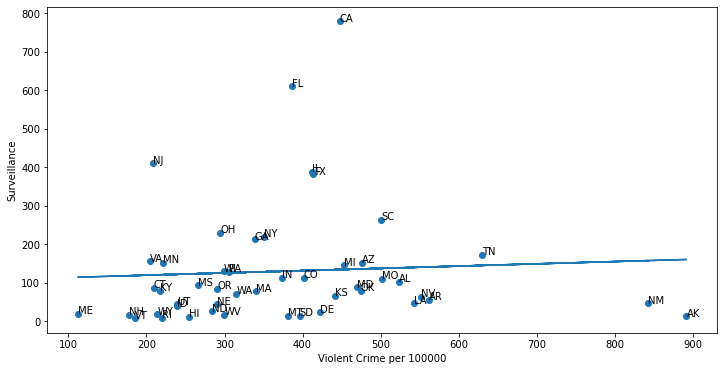

In [29]:
data = state_counts_df[["ViolentCrimePer100000","Surveillance"]].values
x = data[:,0]
y = data[:,1]
ax = plot_scatter(x,y,"Violent Crime per 100000","Surveillance")

#Model
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]
ax.plot(x, model_y)
slope, intercept, r, p

## Multiple Regression 

Above, we have seen that sometimes just using one **independent** variable to predict another fails to capture the whole relationship. In this case we can build a model that takes multiple variables into account. 

For example, if we had **3 values** for each example, we could try and fit the model below 

``
y = ax1 + bx2 + cx3 + d + error
``

This could be 

* Price of painting at auction (`y`) given 
    1. previous sale price (`x1`)
    2. time since last sold (`x2`)
    3. age of painting (`x3`)


* Box office takings for a film (`y`) given 
    1. money spent on advertising (`x1`)
    2. number of A list stars (`x2`)
    3. time of year released (`x3`)
    

* Daily minutes spent on social media app (`y`) given 
    1. number of friends (`x1`)
    2. age (`x2`)
    3. annual wage (`x3`)


### linear_model.LinearRegression()

Again, this can solved algebraicly and use the ``linear_model.LinearRegression()`` function from the ``sklearn`` library to do so. 

Taking an example from **W3Schools**, we can fit a linear model to find the **CO2** emissions of a car, based on both its **weight** and **volume**. 

The resulting coeffients and intercept show us that from a starting point of 80g

* For every 1kg of car, we expect a further 0.0075g of **CO2**

**AND**

* For every 1 cubic cm of car we expect a further 0.0078g of **CO2**.


The interesting thing about this is we can determine contribution of each separate variable to predicting the outcome.

In [30]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
car_df = pd.read_csv("data/cars.csv") 
x = car_df[['Weight', 'Volume']]
y = car_df['CO2'] 
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_) 

[0.00755095 0.00780526] 79.69471929115939


### Predicting New Values, .predict()

Now we have fitted the model, we can use it to predict new values using the ``.predict()`` function.

For example, it we have a car which weighs 800kg and is 2000 cubic cm, we would expect 101.34g of CO2 emission.

In [31]:
regr.predict([[800,2000]])

array([101.34599216])

## Caveats 

George Box (apparently) said 

``
"All models are bad, but some models are useful"
``

So whilst we have found some interesting insights about the requests of surveillance technology between different states in the USA, its also important to note the assumptions made 

* The **Atlas of Surveillance** Dataset is not complete neccessarily, as it crowd sourced by volunteers.

* We have used the fairly course measure of just counting reports, modelling all reports as equal.

* Reported crime is a proxy for crime (more police and surveillance is likely to cause more reported crime, certain crimes (such as sexual harassment and abuse, domesitc abuse) are underreported).

## Summary

* We can model one variable based on the values of one (or more) other variables 


* This model attempts to fit a straight line (or plane) to map this relationship 


* We fit the line trying to minimise the squared error, however, there will always be error in the model 


* We can use this model to predict new values


* Or to explain something about the relationship between the variables 

